In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,7)})

### Things to do:

1. Exploratory Data Analysis 
2. Pre-processing
3. Feature engineering 
4. Model evaluation
    - Split train dataset into train and validation 
    - Compare different models - RF, Regression (LASSO/Ridge Regression), Gradient Boosted Trees
    - Metrics (RMSE), Variable importance (for explanation)
    - LIME (Local Interpretability Model Agnostic)
5. Report / Slide Deck

In [94]:
train.shape

(431732, 20)

In [93]:
test.shape

(107934, 16)

In [87]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [88]:
train.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
154224,2003-03,bedok,4 room,54,Chai Chee Street,10 to 12,101.0,new generation,uncategorized,1981,1.329478,103.921105,0.0,kembangan,bedok,east region,197100.0
427734,2009-02,woodlands,5 room,679,Woodlands Avenue 6,04 to 06,123.0,improved,uncategorized,1998,1.440113,103.802144,0.0,woodlands east,woodlands,north region,306000.0
18749,2008-07,queenstown,4 room,2,holland avenue,07 to 09,88.0,improved,uncategorized,1974,1.313029,103.794375,0.0,leedon park,bukit timah,central region,397800.0
98598,2005-07,bishan,3 room,195,bishan street 13,04 to 06,64.0,simplified,uncategorized,1988,1.348362,103.850897,0.0,bishan east,bishan,central region,169200.0
125337,2000-12,clementi,3 room,308,Clementi Avenue 4,10 to 12,67.0,new generation,uncategorized,1980,1.321052,103.766910,0.0,clementi north,clementi,west region,142200.0


In [90]:
train['year'] = train.month.str[:4].astype('int')
train['price_per_area'] = train['resale_price']/train['floor_area_sqm']
train['lease_duration'] = train['year']-train['lease_commence_date']

In [83]:
train.eco_category.value_counts() # all uncategorized, can drop!

uncategorized    431732
Name: eco_category, dtype: int64

In [86]:
train.isna().sum() # great, no NA values

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
eco_category           0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
resale_price           0
year                   0
price_per_area         0
lease_duration         0
dtype: int64

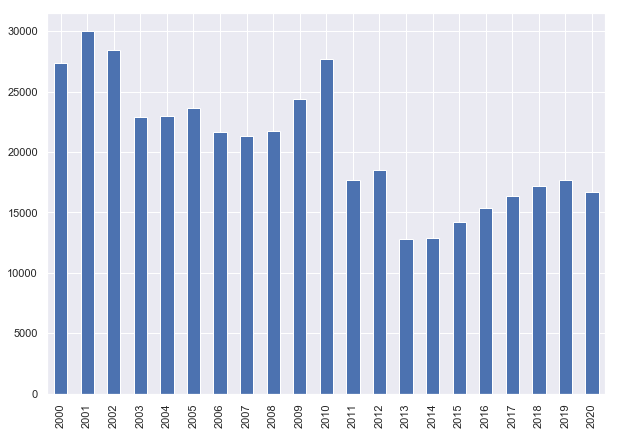

In [57]:
# volume of transactions is lower after 2010 
train.year.value_counts().sort_index().plot(kind='bar')
plt.show()

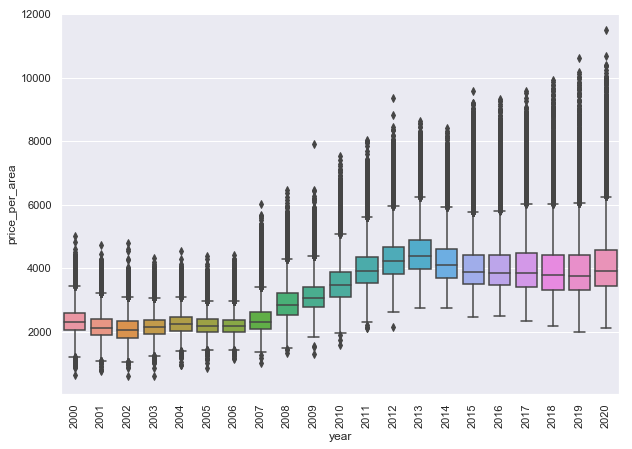

In [91]:
p = sns.boxplot(x='year',y='price_per_area', data=train)
plt.xticks(rotation=90)
plt.show()

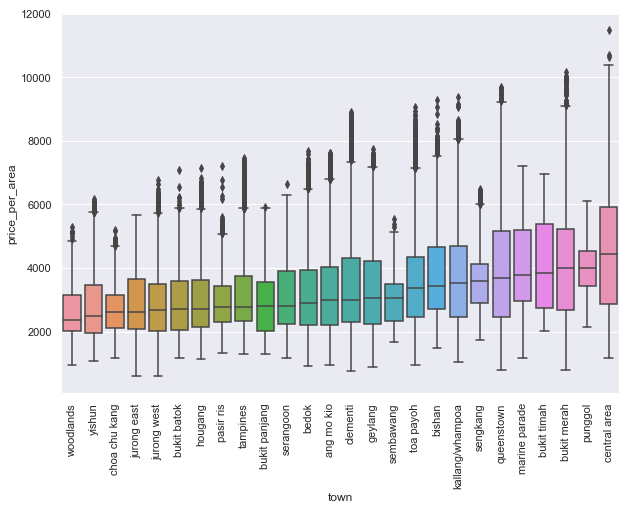

In [56]:
order = train.groupby('town').price_per_area.agg('median').sort_values().index
p = sns.boxplot(x='town',y='price_per_area', data=train, order=order)
plt.xticks(rotation=90)
plt.show()

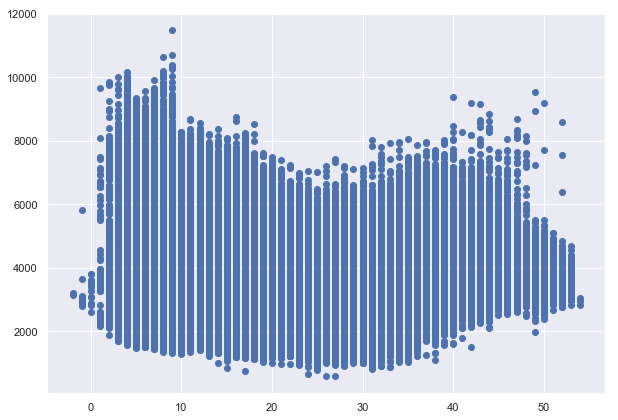

In [79]:
# no clear relationship 
plt.scatter(x=train['lease_duration'],y=train['price_per_area'])
plt.show()

In [78]:
train[['lease_duration', 'price_per_area']].corr(method='pearson')

,lease_duration,price_per_area
lease_duration,1.000000,0.212324
price_per_area,0.212324,1.000000
